In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

# Constants
batch_size = 512
num_classes = 10
epochs = 100
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [8]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Lists to store training and test accuracies for different configurations
train_accuracies = []
test_accuracies = []

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [15]:
# Function to create a CNN model with options for dropout and data augmentation
def create_cnn(use_dropout, use_data_augmentation):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    if use_dropout:
        model.add(Dropout(0.25))  # Enable dropout

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    if use_dropout:
        model.add(Dropout(0.25))  # Enable dropout

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))

    if use_dropout:
        model.add(Dropout(0.5))  # Enable dropout

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # RMSprop optimizer
    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    if not use_data_augmentation:
        print('Not using data augmentation.')
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
    else:
        print('Using real-time data augmentation.')

        # Data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            zca_epsilon=1e-06,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0,
            zoom_range=0,
            channel_shift_range=0,
            fill_mode='nearest',
            cval=0,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0
        )

        # Compute quantities required for feature-wise normalization
        datagen.fit(x_train)

        history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

    train_accuracies.append(history.history['accuracy'])
    test_accuracies.append(history.history['val_accuracy'])

In [16]:
# Create and train models with different configurations
create_cnn(False, False)  # No dropout, no data augmentation
create_cnn(True, False)   # Dropout, no data augmentation
create_cnn(False, True)   # No dropout, data augmentation
create_cnn(True, True)    # Dropout, data augmentation

Not using data augmentation.
Epoch 1/100
98/98 [==============================] - 12s 17ms/step - loss: 5.3824 - accuracy: 0.2164 - val_loss: 2.1760 - val_accuracy: 0.3127
Epoch 2/100
98/98 [==============================] - 1s 8ms/step - loss: 1.8405 - accuracy: 0.3715 - val_loss: 1.5789 - val_accuracy: 0.4443
Epoch 3/100
98/98 [==============================] - 1s 8ms/step - loss: 1.5173 - accuracy: 0.4684 - val_loss: 1.4289 - val_accuracy: 0.4904
Epoch 4/100
98/98 [==============================] - 1s 8ms/step - loss: 1.3537 - accuracy: 0.5275 - val_loss: 1.3662 - val_accuracy: 0.5143
Epoch 5/100
98/98 [==============================] - 1s 8ms/step - loss: 1.2447 - accuracy: 0.5671 - val_loss: 1.4139 - val_accuracy: 0.5129
Epoch 6/100
98/98 [==============================] - 1s 8ms/step - loss: 1.1507 - accuracy: 0.5986 - val_loss: 1.3375 - val_accuracy: 0.5352
Epoch 7/100
98/98 [==============================] - 1s 8ms/step - loss: 1.0718 - accuracy: 0.6310 - val_loss: 1.2556 - val

<ipython-input-15-699ea4d42aa5>:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)


Epoch 1/100
98/98 [==============================] - 29s 278ms/step - loss: 4.5528 - accuracy: 0.2119 - val_loss: 2.0750 - val_accuracy: 0.3074
Epoch 2/100
98/98 [==============================] - 29s 275ms/step - loss: 1.8656 - accuracy: 0.3561 - val_loss: 1.6007 - val_accuracy: 0.4340
Epoch 3/100
98/98 [==============================] - 28s 276ms/step - loss: 1.6110 - accuracy: 0.4336 - val_loss: 1.4952 - val_accuracy: 0.4709
Epoch 4/100
98/98 [==============================] - 27s 270ms/step - loss: 1.4928 - accuracy: 0.4701 - val_loss: 1.3749 - val_accuracy: 0.5127
Epoch 5/100
98/98 [==============================] - 28s 275ms/step - loss: 1.4116 - accuracy: 0.5016 - val_loss: 1.3333 - val_accuracy: 0.5276
Epoch 6/100
98/98 [==============================] - 28s 276ms/step - loss: 1.3502 - accuracy: 0.5244 - val_loss: 1.3044 - val_accuracy: 0.5470
Epoch 7/100
98/98 [==============================] - 28s 273ms/step - loss: 1.3076 - accuracy: 0.5407 - val_loss: 1.2155 - val_accuracy:

In [20]:
!pip install seaborn

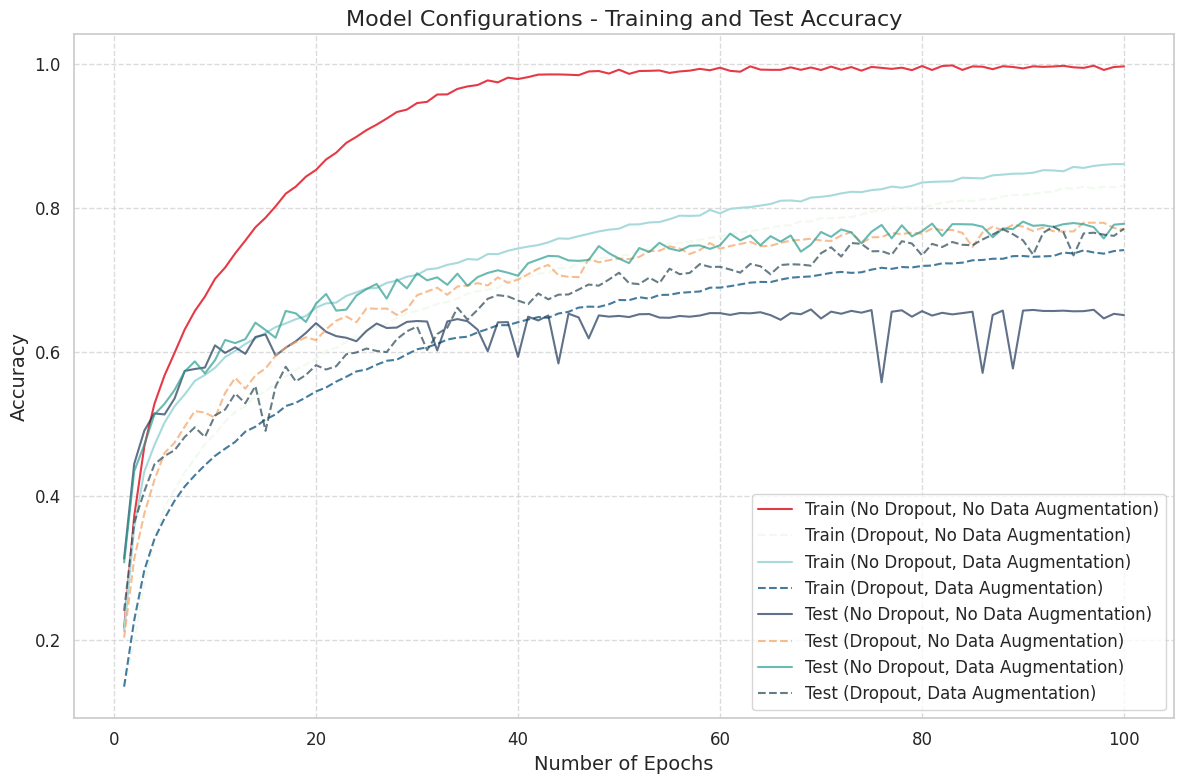

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with eight colors
custom_palette = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261', '#2A9D8F', '#264653']

# Set the Seaborn style and custom color palette
sns.set(style="whitegrid")
sns.set_palette(custom_palette)

# Plot the training and test accuracies
plt.figure(figsize=(12, 8))
epochs_range = range(1, epochs + 1)

# Define line styles
line_styles = ['-', '--', '-', '--']

# Plot training accuracies
for i in range(4):
    plt.plot(epochs_range, train_accuracies[i], label=f'Train ({["No Dropout, No Data Augmentation", "Dropout, No Data Augmentation", "No Dropout, Data Augmentation", "Dropout, Data Augmentation"][i]})', linestyle=line_styles[i])

# Plot test accuracies
for i in range(4):
    plt.plot(epochs_range, test_accuracies[i], label=f'Test ({["No Dropout, No Data Augmentation", "Dropout, No Data Augmentation", "No Dropout, Data Augmentation", "Dropout, Data Augmentation"][i]})', linestyle=line_styles[i], alpha=0.7)

plt.xlabel('Number of Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Configurations - Training and Test Accuracy', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()  # Display the plot

